# Speed benchmarks
This is just for having a quick reference of how the speed of running the program scales

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')
# sys.path.append('/home/heberto/learning/attractor_sequences/benchmarking/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machine

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '321620ef1b753fe42375bbf535c9ab941b72ae26'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load the libraries

In [3]:
from benchmarking.standard_program import run_standard_program, calculate_succes_program, training_program
import timeit

In [4]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped


## Standard program
#### Minicolumns

In [5]:
hypercolumns = 4
minicolumns_range = np.arange(10, 100, 5)
epochs = 1
times_minicolumns = []

for minicolumns in minicolumns_range:
    function = wrapper(run_standard_program, hypercolumns=hypercolumns, minicolumns=minicolumns, epochs=epochs)
    time = timeit.timeit(function, number=1)
    times_minicolumns.append(time)

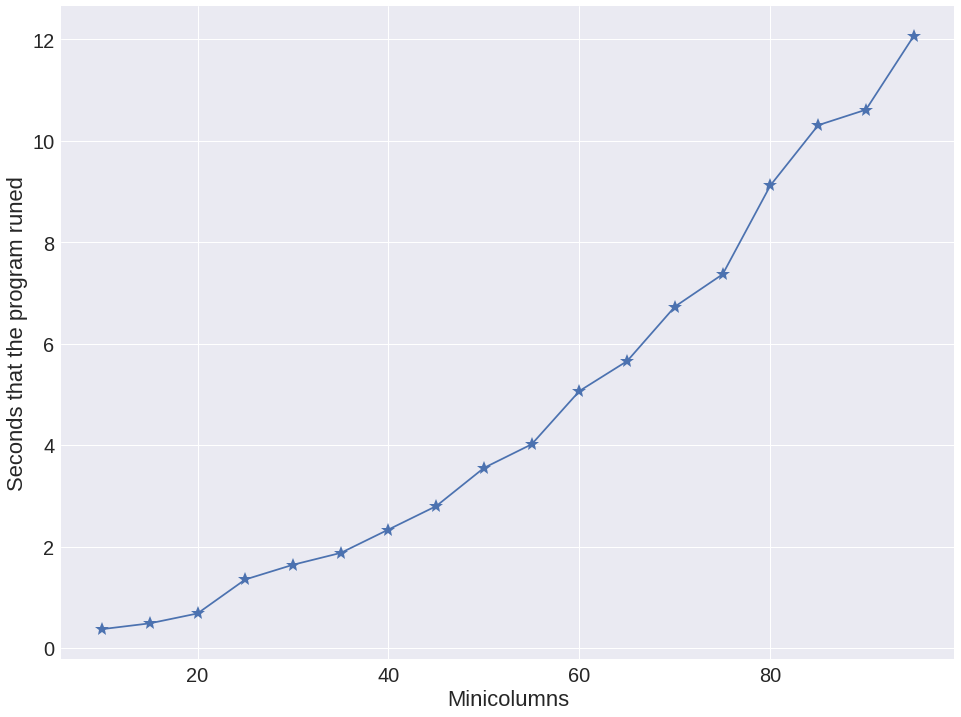

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(minicolumns_range, times_minicolumns, '*-', markersize=14)
ax.set_xlabel('Minicolumns')
ax.set_ylabel('Seconds that the program runed');

#### Hypercolumns

In [7]:
hypercolumns_range = np.arange(4, 20, 2)
minicolumns = 20
epochs = 1

times_hypercolumns = []
for hypercolumns in hypercolumns_range:
    function = wrapper(run_standard_program, hypercolumns, minicolumns, epochs)
    time = timeit.timeit(function, number=1)
    times_hypercolumns.append(time)

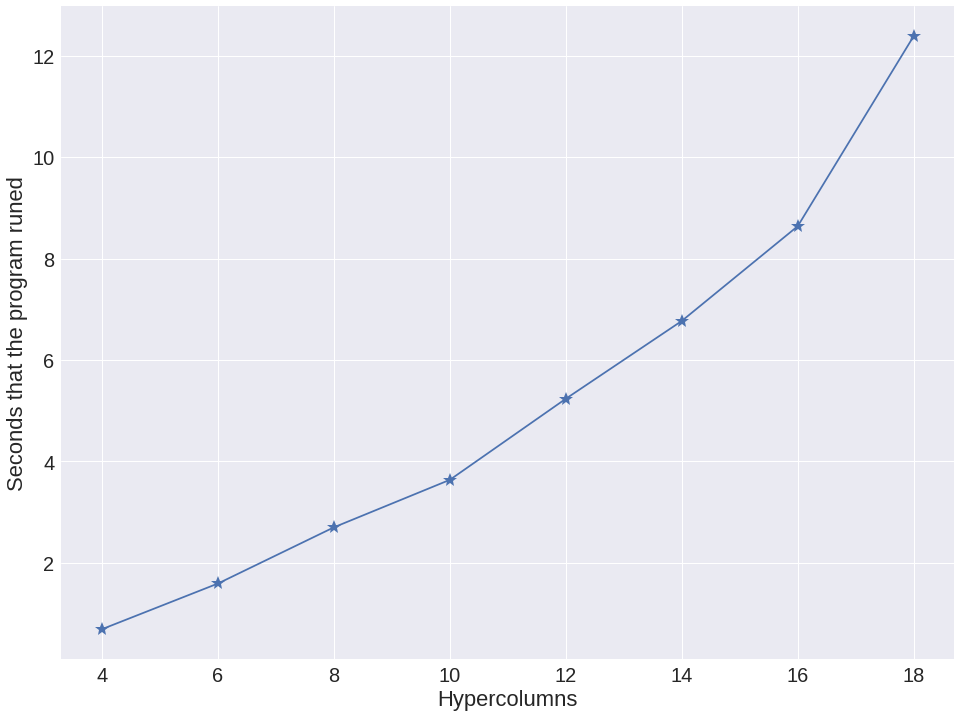

In [8]:
sns.set(font_scale=2.0)
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(hypercolumns_range, times_hypercolumns, '*-', markersize=14)
ax.set_xlabel('Hypercolumns')
ax.set_ylabel('Seconds that the program runed');

#### Epochs

In [9]:
hypercolumns = 4
minicolumns = 20
epochs_range = np.arange(1, 10, 1)

times_epochs = []
for epochs in epochs_range:
    function = wrapper(run_standard_program, hypercolumns, minicolumns, epochs)
    time = timeit.timeit(function, number=1)
    times_epochs.append(time)

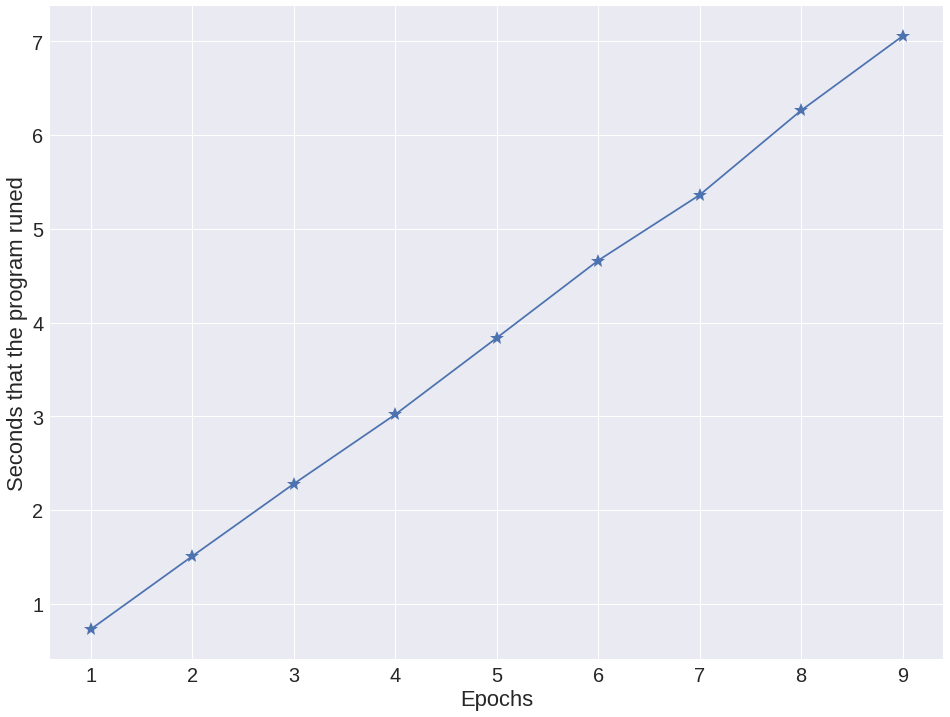

In [10]:
sns.set(font_scale=2.0)
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(epochs_range, times_epochs, '*-', markersize=14)
ax.set_xlabel('Epochs')
ax.set_ylabel('Seconds that the program runed')

#### Everything to compare

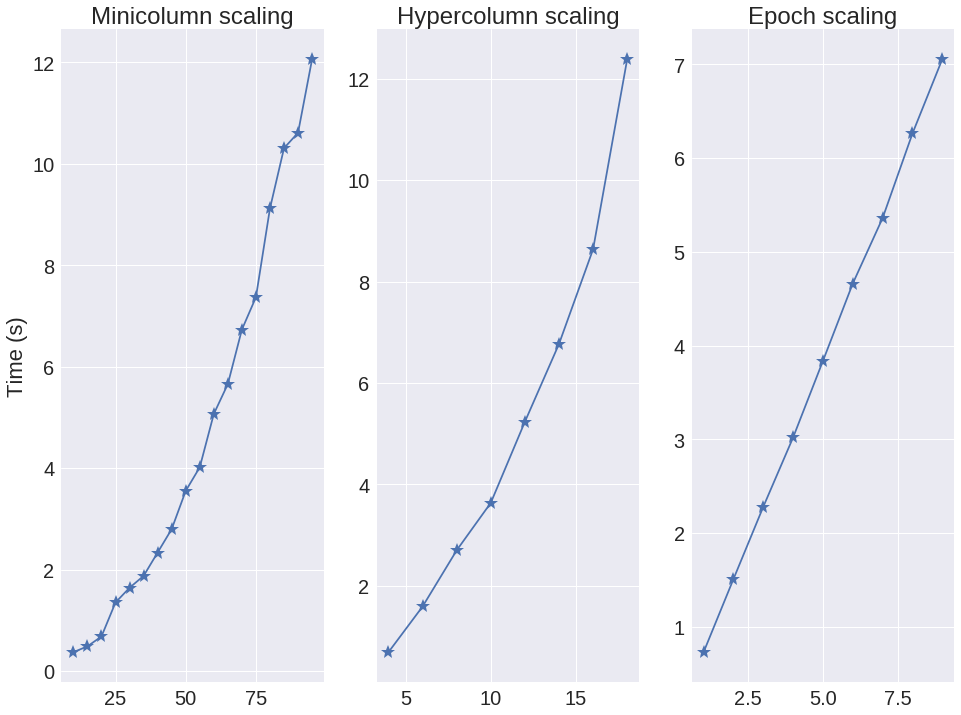

In [11]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(minicolumns_range, times_minicolumns, '*-', markersize=14)
ax2.plot(hypercolumns_range, times_hypercolumns, '*-', markersize=14)
ax3.plot(epochs_range, times_epochs, '*-', markersize=14)

ax1.set_title('Minicolumn scaling')
ax2.set_title('Hypercolumn scaling')
ax3.set_title('Epoch scaling')

ax1.set_ylabel('Time (s)');


## Training and recalling times
Her we run the standard program before and then we test how long it takes for it to run recalls and test recall success

In [12]:
hypercolumns = 4
minicolumns = 10
epochs = 3
manager = run_standard_program(hypercolumns, minicolumns, epochs)

#### Recall only

In [13]:
T_recall_range = np.arange(3, 20, 1)
time_recall = []

for T_recall in T_recall_range:
    function = wrapper(training_program, manager=manager, T_recall=T_recall)
    time = timeit.timeit(function, number=1)
    time_recall.append(time)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


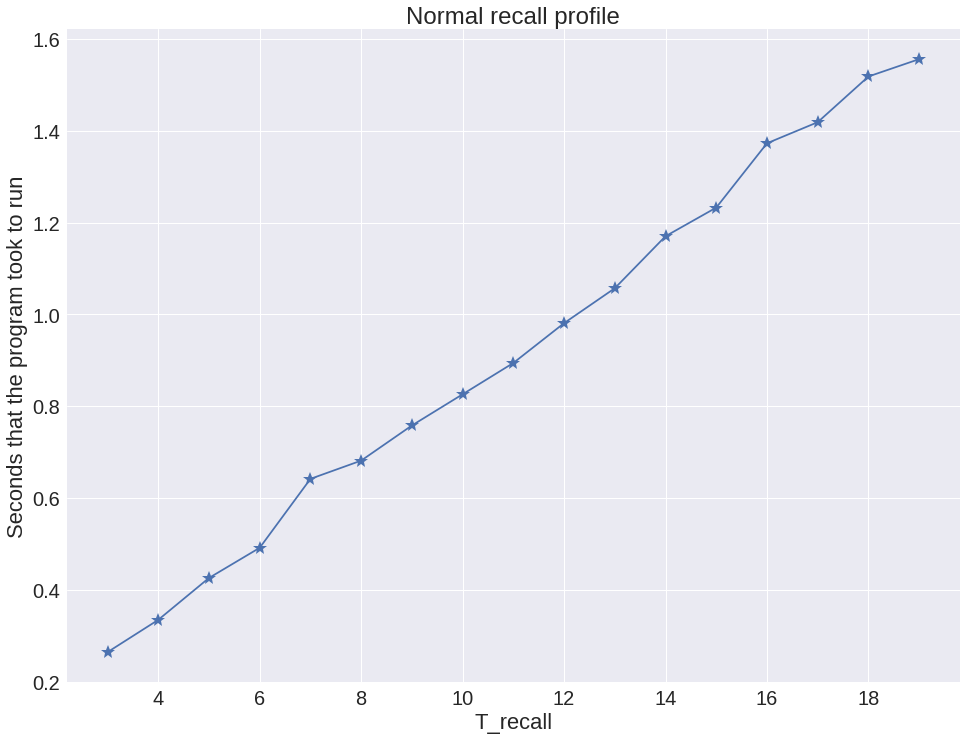

In [17]:
# Plot4
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(T_recall_range, time_recall, '*-', markersize=14)

ax.set_xlabel('T_recall')
ax.set_ylabel('Seconds that the program took to run')
ax.set_title('Normal recall profile')
plt.show()

#### Success recall

In [18]:
T_recall_range = np.arange(3, 20, 1)
time_success = []

for T_recall in T_recall_range:
    function = wrapper(calculate_succes_program, manager=manager, T_recall=T_recall)
    time = timeit.timeit(function, number=1)
    time_success.append(time)

    

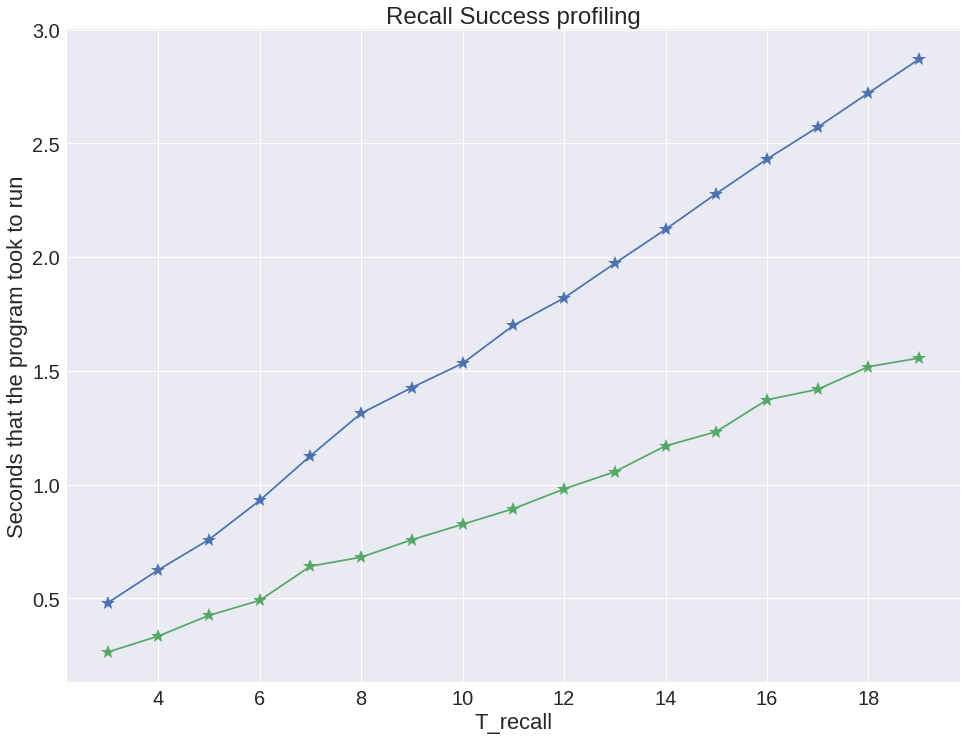

In [20]:
# Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(T_recall_range, time_success, '*-', markersize=14)
ax.plot(T_recall_range, time_recall, '*-', markersize=14)

ax.set_xlabel('T_recall')
ax.set_ylabel('Seconds that the program took to run')
ax.set_title('Recall Success profiling')
plt.show()